# Earthquake Tsunami Prediction Analysis
## DATA1030 Final Project
**Student:** Justin Xiao  
**Institution:** Brown University  
**Date:** October 24, 2025  
**GitHub Repository:** [Earthquake-Tsunami](https://github.com/JustinXre2020/Earthquake-Tsunami)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Load both datasets
df1 = pd.read_csv('earthquake_1995-2023.csv')
df2 = pd.read_csv('earthquake_data.csv')

print(f"Dataset 1 (1995-2023): {df1.shape}")
print(f"Dataset 2 (recent data): {df2.shape}")

# Check column overlap
print(f"\nDataset 1 columns: {df1.columns.tolist()}")
print(f"\nDataset 2 columns: {df2.columns.tolist()}")

# Find common columns for merging
common_cols = list(set(df1.columns) & set(df2.columns))
print(f"\nCommon columns: {common_cols}")

# Select relevant columns for analysis (keep only features present in both)
analysis_columns = ['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']

# Filter to common columns that exist in both datasets
df1_filtered = df1[analysis_columns].copy()
df2_filtered = df2[analysis_columns].copy()

# Combine datasets
df = pd.concat([df1_filtered, df2_filtered], ignore_index=True)

# Remove duplicates in case some events appear in both datasets
df = df.drop_duplicates()

print(f"Combined dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset 1 (1995-2023): (1000, 19)
Dataset 2 (recent data): (782, 19)

Dataset 1 columns: ['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'location', 'continent', 'country']

Dataset 2 columns: ['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'location', 'continent', 'country']

Common columns: ['date_time', 'gap', 'location', 'longitude', 'depth', 'continent', 'country', 'latitude', 'mmi', 'magType', 'nst', 'alert', 'dmin', 'net', 'cdi', 'title', 'tsunami', 'sig', 'magnitude']
Combined dataset shape: (1000, 11)

First few rows:


,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960


In [71]:
# Basic dataset information
print("Dataset Information:")
print(df.info())
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   depth      1000 non-null   float64
 9   latitude   1000 non-null   float64
 10  longitude  1000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 93.8 KB
None

Column Names:
['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']

Data Types:
magnitude    float64
cdi            int64
mmi            int64
tsunami        int64
sig            int64
nst            int64
dmin         float64
gap          float64
dept

In [72]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())
print("\nTarget Variable Distribution:")
print(df['tsunami'].value_counts())
print(f"\nTsunami occurrence rate: {df['tsunami'].mean()}")

Summary Statistics:
         magnitude          cdi         mmi      tsunami          sig  \
count  1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean      6.940150     3.605000     6.02700     0.325000   847.915000   
std       0.438148     3.328972     1.43399     0.468609   301.802632   
min       6.500000     0.000000     1.00000     0.000000   650.000000   
25%       6.600000     0.000000     5.00000     0.000000   691.000000   
50%       6.800000     4.000000     6.00000     0.000000   744.000000   
75%       7.100000     7.000000     7.00000     1.000000   874.250000   
max       9.100000     9.000000    10.00000     1.000000  2910.000000   

               nst         dmin          gap        depth     latitude  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    193.918000     1.125174    20.926290    74.612541     4.315554   
std     239.045858     2.073164    24.415895   130.812590    26.633320   
min       0.000000     0.0

In [73]:
# Missing values analysis
print("Missing Values Analysis:")
missing_counts = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])
print(f"\nRows with ANY missing values: {df.isnull().any(axis=1).sum()} ({df.isnull().any(axis=1).sum()/len(df)*100}%)")
print(f"Total data points with missing values: {df.isnull().sum().sum()}")

Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

Rows with ANY missing values: 0 (0.0%)
Total data points with missing values: 0


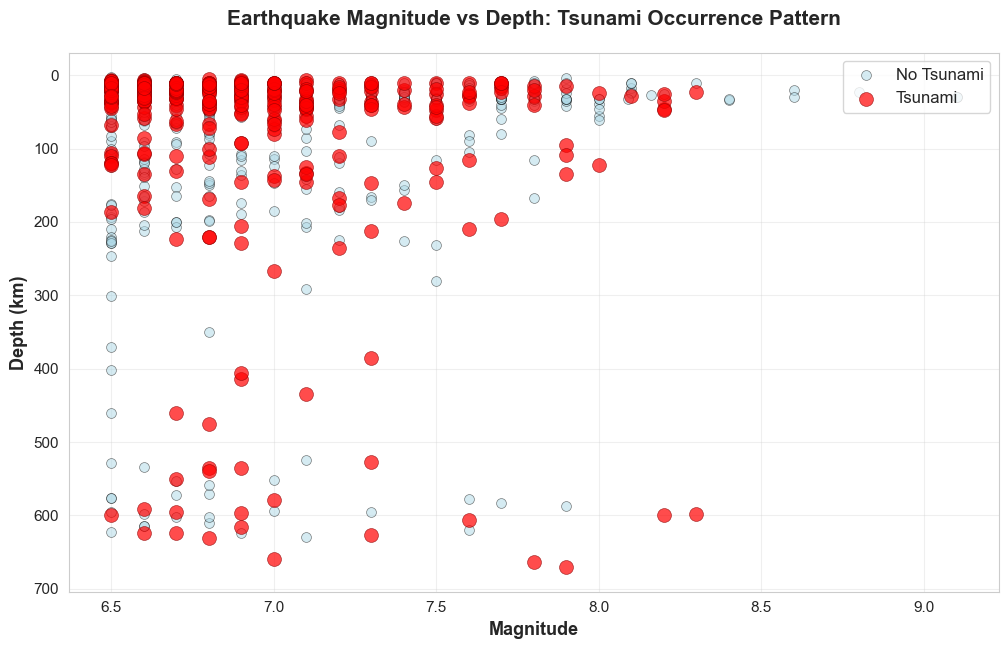

INSIGHT: Tsunamis predominantly occur with shallow earthquakes (< 100km depth)
Average depth for tsunami events: 87.93531076923077 km
Average depth for non-tsunami events: 68.19787407407408 km


In [74]:
# Figure 1: Magnitude vs Depth (Continuous vs Continuous) - colored by tsunami
fig, ax = plt.subplots(figsize=(12, 7))

# Separate tsunami and non-tsunami events
tsunami_yes = df[df['tsunami'] == 1]
tsunami_no = df[df['tsunami'] == 0]

ax.scatter(tsunami_no['magnitude'], tsunami_no['depth'], 
           alpha=0.5, s=50, c='lightblue', label='No Tsunami', edgecolors='black', linewidth=0.5)
ax.scatter(tsunami_yes['magnitude'], tsunami_yes['depth'], 
           alpha=0.7, s=100, c='red', label='Tsunami', edgecolors='darkred', linewidth=0.5)

ax.set_xlabel('Magnitude', fontsize=13, fontweight='bold')
ax.set_ylabel('Depth (km)', fontsize=13, fontweight='bold')
ax.set_title('Earthquake Magnitude vs Depth: Tsunami Occurrence Pattern', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='upper right')
ax.grid(True, alpha=0.3)
ax.invert_yaxis()  # Conventional to show shallow earthquakes at top

plt.show()

print("INSIGHT: Tsunamis predominantly occur with shallow earthquakes (< 100km depth)")
print(f"Average depth for tsunami events: {tsunami_yes['depth'].mean()} km")
print(f"Average depth for non-tsunami events: {tsunami_no['depth'].mean()} km")

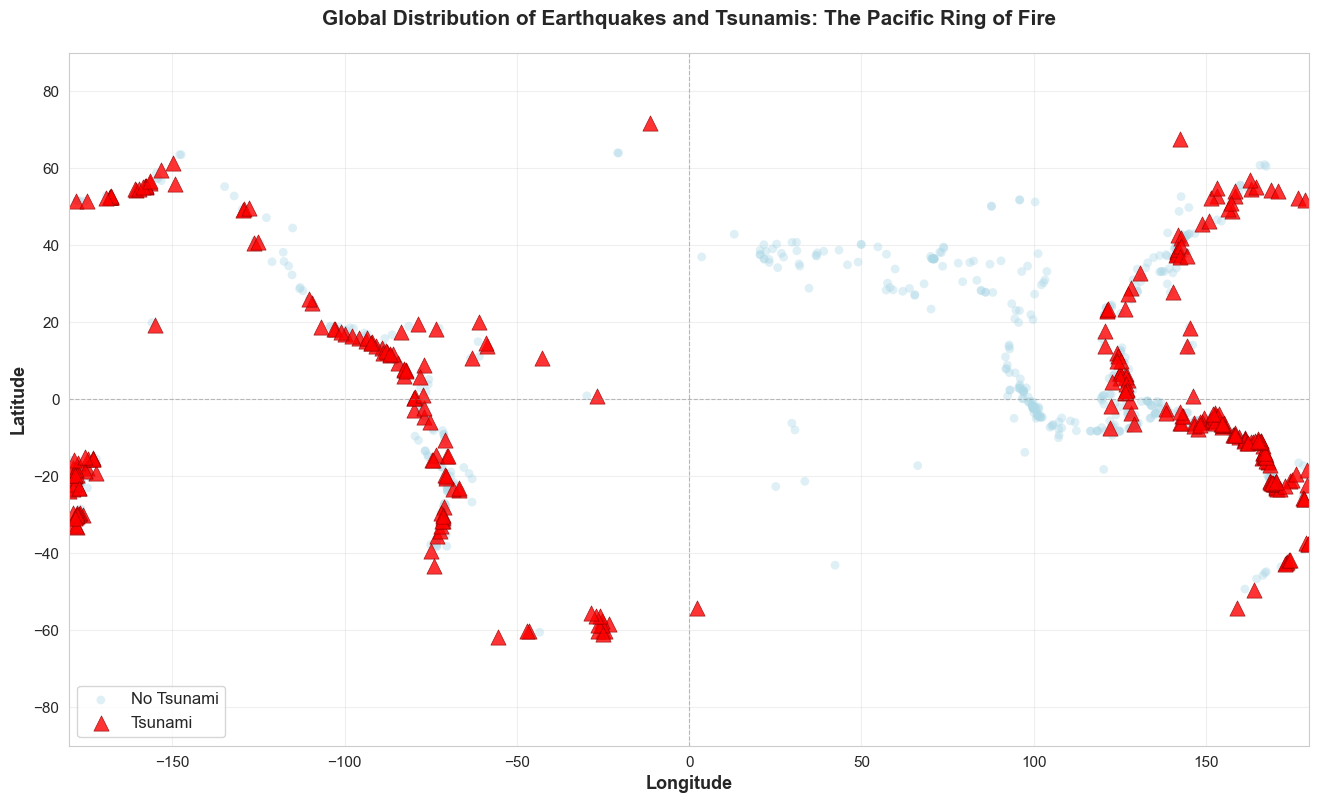

INSIGHT: Tsunamis cluster around the Pacific Ring of Fire (Pacific Ocean rim)
Tsunami events in Pacific region (lon: 100-180 or -180 to -60): 305 / 325


In [75]:
# Figure 2: Geographic Distribution (Latitude vs Longitude) - world map view
fig, ax = plt.subplots(figsize=(16, 9))

# Plot all earthquakes
ax.scatter(tsunami_no['longitude'], tsunami_no['latitude'], 
           alpha=0.4, s=40, c='lightblue', label='No Tsunami', edgecolors='none')
ax.scatter(tsunami_yes['longitude'], tsunami_yes['latitude'], 
           alpha=0.8, s=120, c='red', label='Tsunami', edgecolors='darkred', 
           linewidth=0.5, marker='^')

ax.set_xlabel('Longitude', fontsize=13, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=13, fontweight='bold')
ax.set_title('Global Distribution of Earthquakes and Tsunamis: The Pacific Ring of Fire', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='lower left')
ax.grid(True, alpha=0.3)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# Add reference lines for equator and prime meridian
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)

plt.show()

print("INSIGHT: Tsunamis cluster around the Pacific Ring of Fire (Pacific Ocean rim)")
print(f"Tsunami events in Pacific region (lon: 100-180 or -180 to -60): "
      f"{((tsunami_yes['longitude'] > 100) | (tsunami_yes['longitude'] < -60)).sum()} / {len(tsunami_yes)}")

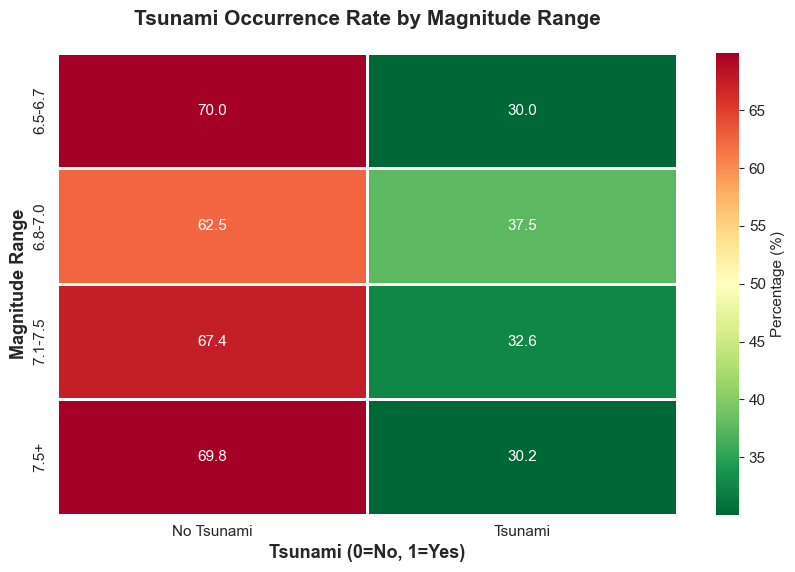

INSIGHT: Tsunami probability increases dramatically with magnitude

Tsunami rates by magnitude:
  6.5-6.7: 30.045871559633024% tsunami rate
  6.8-7.0: 37.547892720306514% tsunami rate
  7.1-7.5: 32.62032085561498% tsunami rate
  7.5+: 30.17241379310345% tsunami rate


In [76]:
# Figure 3: Tsunami occurrence by magnitude bins (Categorical vs Categorical - heatmap style)
# Create magnitude bins
df['magnitude_bin'] = pd.cut(df['magnitude'], 
                              bins=[6.4, 6.7, 7.0, 7.5, 10], 
                              labels=['6.5-6.7', '6.8-7.0', '7.1-7.5', '7.5+'])

# Create crosstab
tsunami_by_mag = pd.crosstab(df['magnitude_bin'], df['tsunami'], 
                              normalize='index') * 100

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(tsunami_by_mag, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'Percentage (%)'}, ax=ax, linewidths=2, linecolor='white')
ax.set_xlabel('Tsunami (0=No, 1=Yes)', fontsize=13, fontweight='bold')
ax.set_ylabel('Magnitude Range', fontsize=13, fontweight='bold')
ax.set_title('Tsunami Occurrence Rate by Magnitude Range', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticklabels(['No Tsunami', 'Tsunami'], rotation=0)

plt.show()

print("INSIGHT: Tsunami probability increases dramatically with magnitude")
print(f"\nTsunami rates by magnitude:")
for idx, row in tsunami_by_mag.iterrows():
    print(f"  {idx}: {row[1]}% tsunami rate")

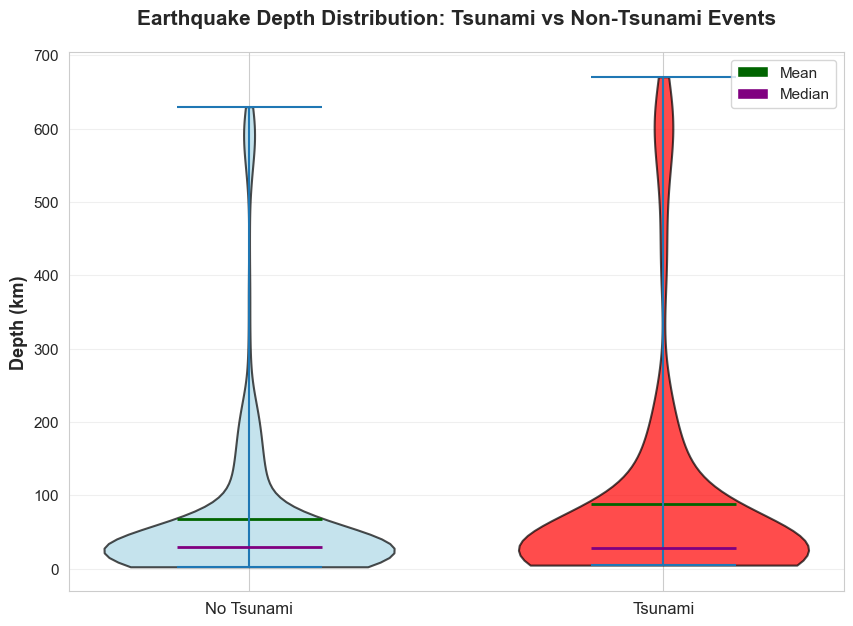

INSIGHT: Tsunami events have dramatically different depth distribution
Median depth - No Tsunami: 30.0 km
Median depth - Tsunami: 28.0 km
75th percentile depth for tsunamis: 66.0 km


In [77]:
# Figure 4: Depth distribution by tsunami status (Categorical vs Continuous - violin plot)
fig, ax = plt.subplots(figsize=(10, 7))

# Create violin plot
parts = ax.violinplot([tsunami_no['depth'].dropna(), tsunami_yes['depth'].dropna()],
                       positions=[0, 1], showmeans=True, showmedians=True, widths=0.7)

# Customize colors
colors = ['lightblue', 'red']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

# Customize other elements
parts['cmeans'].set_edgecolor('darkgreen')
parts['cmeans'].set_linewidth(2)
parts['cmedians'].set_edgecolor('purple')
parts['cmedians'].set_linewidth(2)

ax.set_xticks([0, 1])
ax.set_xticklabels(['No Tsunami', 'Tsunami'], fontsize=12)
ax.set_ylabel('Depth (km)', fontsize=13, fontweight='bold')
ax.set_title('Earthquake Depth Distribution: Tsunami vs Non-Tsunami Events', 
             fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='darkgreen', label='Mean'),
                  Patch(facecolor='purple', label='Median')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.show()

print("INSIGHT: Tsunami events have dramatically different depth distribution")
print(f"Median depth - No Tsunami: {tsunami_no['depth'].median()} km")
print(f"Median depth - Tsunami: {tsunami_yes['depth'].median()} km")
print(f"75th percentile depth for tsunamis: {tsunami_yes['depth'].quantile(0.75)} km")

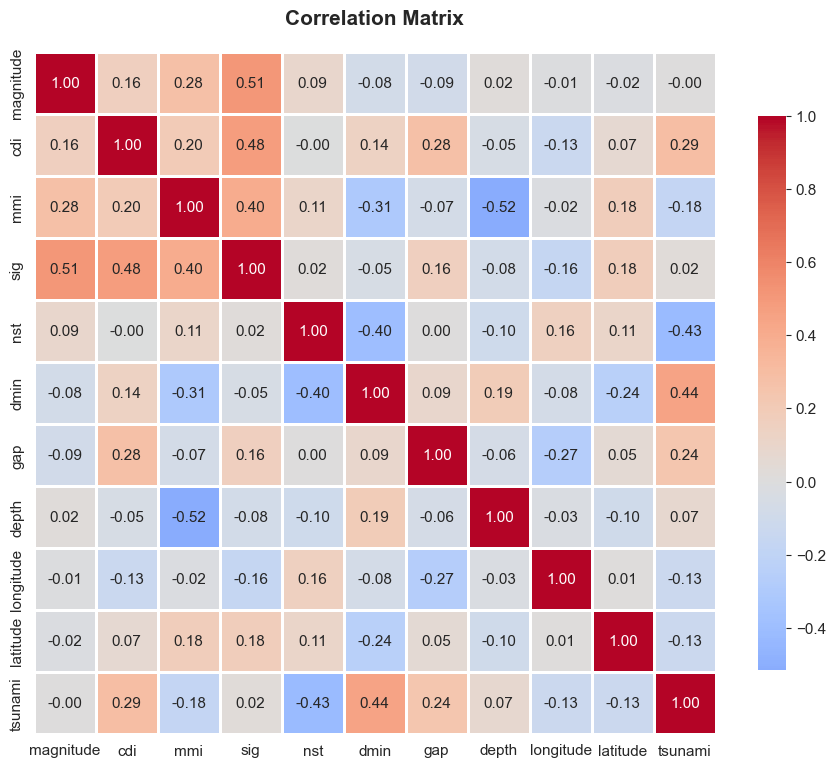

Key correlations with tsunami:
tsunami      1.000000
dmin         0.443179
cdi          0.292202
gap          0.236259
depth        0.070705
sig          0.024848
magnitude   -0.001213
latitude    -0.127002
longitude   -0.131340
mmi         -0.175441
nst         -0.426026
Name: tsunami, dtype: float64


In [78]:
# Additional Figure: Correlation heatmap for continuous features
continuous_features = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'longitude', 'latitude', 'tsunami']
corr_data = df[continuous_features].corr()

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix', 
             fontsize=15, fontweight='bold', pad=20)

plt.show()

print("Key correlations with tsunami:")
print(corr_data['tsunami'].sort_values(ascending=False))

In [79]:
from sklearn.model_selection import train_test_split

# Separate features and target, drop magnitude_bin used for visualization
df_clean = df.drop('magnitude_bin', axis=1, errors='ignore')

y = df_clean['tsunami']
X = df_clean.drop('tsunami', axis=1)

print(f"Total samples: {len(X)}")
print(f"Total features: {len(X.columns)}")
print(f"\nFeature columns: {X.columns.tolist()}")

# First split: separate training set (60%)
X_train, X_other, y_train, y_other = train_test_split(
    X, y, train_size=0.6, random_state=42, stratify=y
)

# Second split: validation (20%) and test (20%) from remaining 40%
X_val, X_test, y_val, y_test = train_test_split(
    X_other, y_other, train_size=0.5, random_state=42, stratify=y_other
)

print("Split Summary:")
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100}%)")

print("Target distribution (tsunami rate):")
print(f"Training: {y_train.mean()}")
print(f"Validation: {y_val.mean()}")
print(f"Test: {y_test.mean()}")
print("Stratified split maintains class balance across all sets")

Total samples: 1000
Total features: 10

Feature columns: ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']
Split Summary:
Training set: 600 samples (60.0%)
Validation set: 200 samples (20.0%)
Test set: 200 samples (20.0%)
Target distribution (tsunami rate):
Training: 0.325
Validation: 0.325
Test: 0.325
Stratified split maintains class balance across all sets


In [ ]:
# Analyze missing values before preprocessing
print("Missing Values in Training Set:")
missing_train = X_train.isnull().sum()
missing_train_pct = (missing_train / len(X_train)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_train,
    'Percentage': missing_train_pct
}).sort_values('Missing Count', ascending=False)

print(missing_summary[missing_summary['Missing Count'] > 0])
print(f"Total data points in training set: {X_train.shape[0] * X_train.shape[1]}")
print(f"Data points with missing values: {X_train.isnull().sum().sum()}")

Missing Values in Training Set:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
Total data points in training set: 6000
Data points with missing values: 0


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create preprocessing pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

# CRITICAL: Fit ONLY on training data
preprocessor.fit(X_train)

# Transform all sets
X_train_processed = preprocessor.transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# Convert back to DataFrames for easier inspection
X_train_processed = pd.DataFrame(X_train_processed, columns=X_train.columns, index=X_train.index)
X_val_processed = pd.DataFrame(X_val_processed, columns=X_val.columns, index=X_val.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=X_test.columns, index=X_test.index)

print("Verification - Training set statistics (should have mean≈0, std≈1):")
print(f"Mean of features: {X_train_processed.mean().mean()}")
print(f"Std of features: {X_train_processed.std().mean()}")
print("Missing values after preprocessing:")
print(f"Training: {X_train_processed.isnull().sum().sum()}")
print(f"Validation: {X_val_processed.isnull().sum().sum()}")
print(f"Test: {X_test_processed.isnull().sum().sum()}")
print("No missing values remaining!")

Verification - Training set statistics (should have mean≈0, std≈1):
Mean of features: 1.599461304143309e-16
Std of features: 1.000834376448872
Missing values after preprocessing:
Training: 0
Validation: 0
Test: 0
No missing values remaining!
